# BREAST CANCER CLASSIFICATION PROJECT

![Breast cancer image](./download.jpg)

## Business Problem
 
 Death among women has various factors and one of the leading causes being `Breast Cancer`. A good way of improving the survival rates and giving out personalized treatments depends on whether or not it can be detected early or predicted in advance. The intricacy and diversity of patient data, including age, tumor size, hormone receptor status, and staging, can make it difficult for medical professionals to assess the severity and course of the illness.
 
 A hospital that deals with breast cancer patients want a solution that can be used to classify patients based on their breast cancer characteristics and tell if they are likely to experience a more aggressive cancer. then secondly they would like to be able to predict a patients survival time based oon various factors both medical and demographic. The company can increase the precision of diagnosis and treatment strategies by using machine learning to predict survival months and classify the cancer status (e.g., aggressive vs. non-aggressive). The ultimate goal is to increase survival rates, reduce patient suffering, and optimize the overall cost-effectiveness of breast cancer care.

 

In [133]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
#Load the dataset
data = pd.read_csv('Breast_Cancer.csv')
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [98]:
#Look at the basic info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [99]:
#Check for missing values
data.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [100]:
#Check for any duplications in the dataset
data.duplicated().sum()

1

In [101]:
#Drop the duplicate values found
data.drop_duplicates(inplace=True)
#check if there still any duplicates left
data.duplicated().sum()

0

In [102]:
#Look at the total number of unique values within the dataset
for column in data.columns:
    print(f'{column} has {data[column].nunique()} unique values')

Age has 40 unique values
Race has 3 unique values
Marital Status has 5 unique values
T Stage  has 4 unique values
N Stage has 3 unique values
6th Stage has 5 unique values
differentiate has 4 unique values
Grade has 4 unique values
A Stage has 2 unique values
Tumor Size has 110 unique values
Estrogen Status has 2 unique values
Progesterone Status has 2 unique values
Regional Node Examined has 54 unique values
Reginol Node Positive has 38 unique values
Survival Months has 107 unique values
Status has 2 unique values


In [103]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,30.477007,14.358439,4.158837,71.301765
std,8.963118,21.121253,8.100241,5.109724,22.923009
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [104]:
#here we are going to group the data to help us later on when performing regression and classification
numerical_cols = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']
categorical_cols = ['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']

## Linear Regression

for this part we want to create a simple model that will see the numerical data being fitted into a linear regression in order to predict the number of survival months

In [105]:
#Initialize the scaler
scaler = StandardScaler()

#Select the feature and target variables
data_numerals = data[numerical_cols]

#define the target 
y_lin = data_numerals['Survival Months']

#fit and transform the features
X_lin = scaler.fit_transform(data_numerals.drop('Survival Months', axis = 1))

In [106]:
#Now let's create a linear regression model that will cater for the numerical data that we have in the data set
lg_model = sm.OLS(y_lin, sm.add_constant(X_lin))
lg_results = lg_model.fit()
lg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Survival Months   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     23.57
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           2.73e-19
Time:                        13:06:01   Log-Likelihood:                -18262.
No. Observations:                4023   AIC:                         3.653e+04
Df Residuals:                    4018   BIC:                         3.657e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.3018      0.357    199.491      0.000      70.601      72.003
x1            -0.2444      0.359     -0.681      0.496      -0.948       0.459
x2            -1.3458      0.370     -3.641      0.000      -2.071      -0.621
x3             0.9211      0.393      2.347      0.019       0.152       1.691
x4            -3.1517      0.402     -7.832      0.000      -3.941      -2.363
==============================================================================
Omnibus:                      169.896   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.623
Skew:                          -0.535   Prob(JB):                     2.45e-42
Kurtosis:                       2.980   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# CLASSIFICATION MODELS

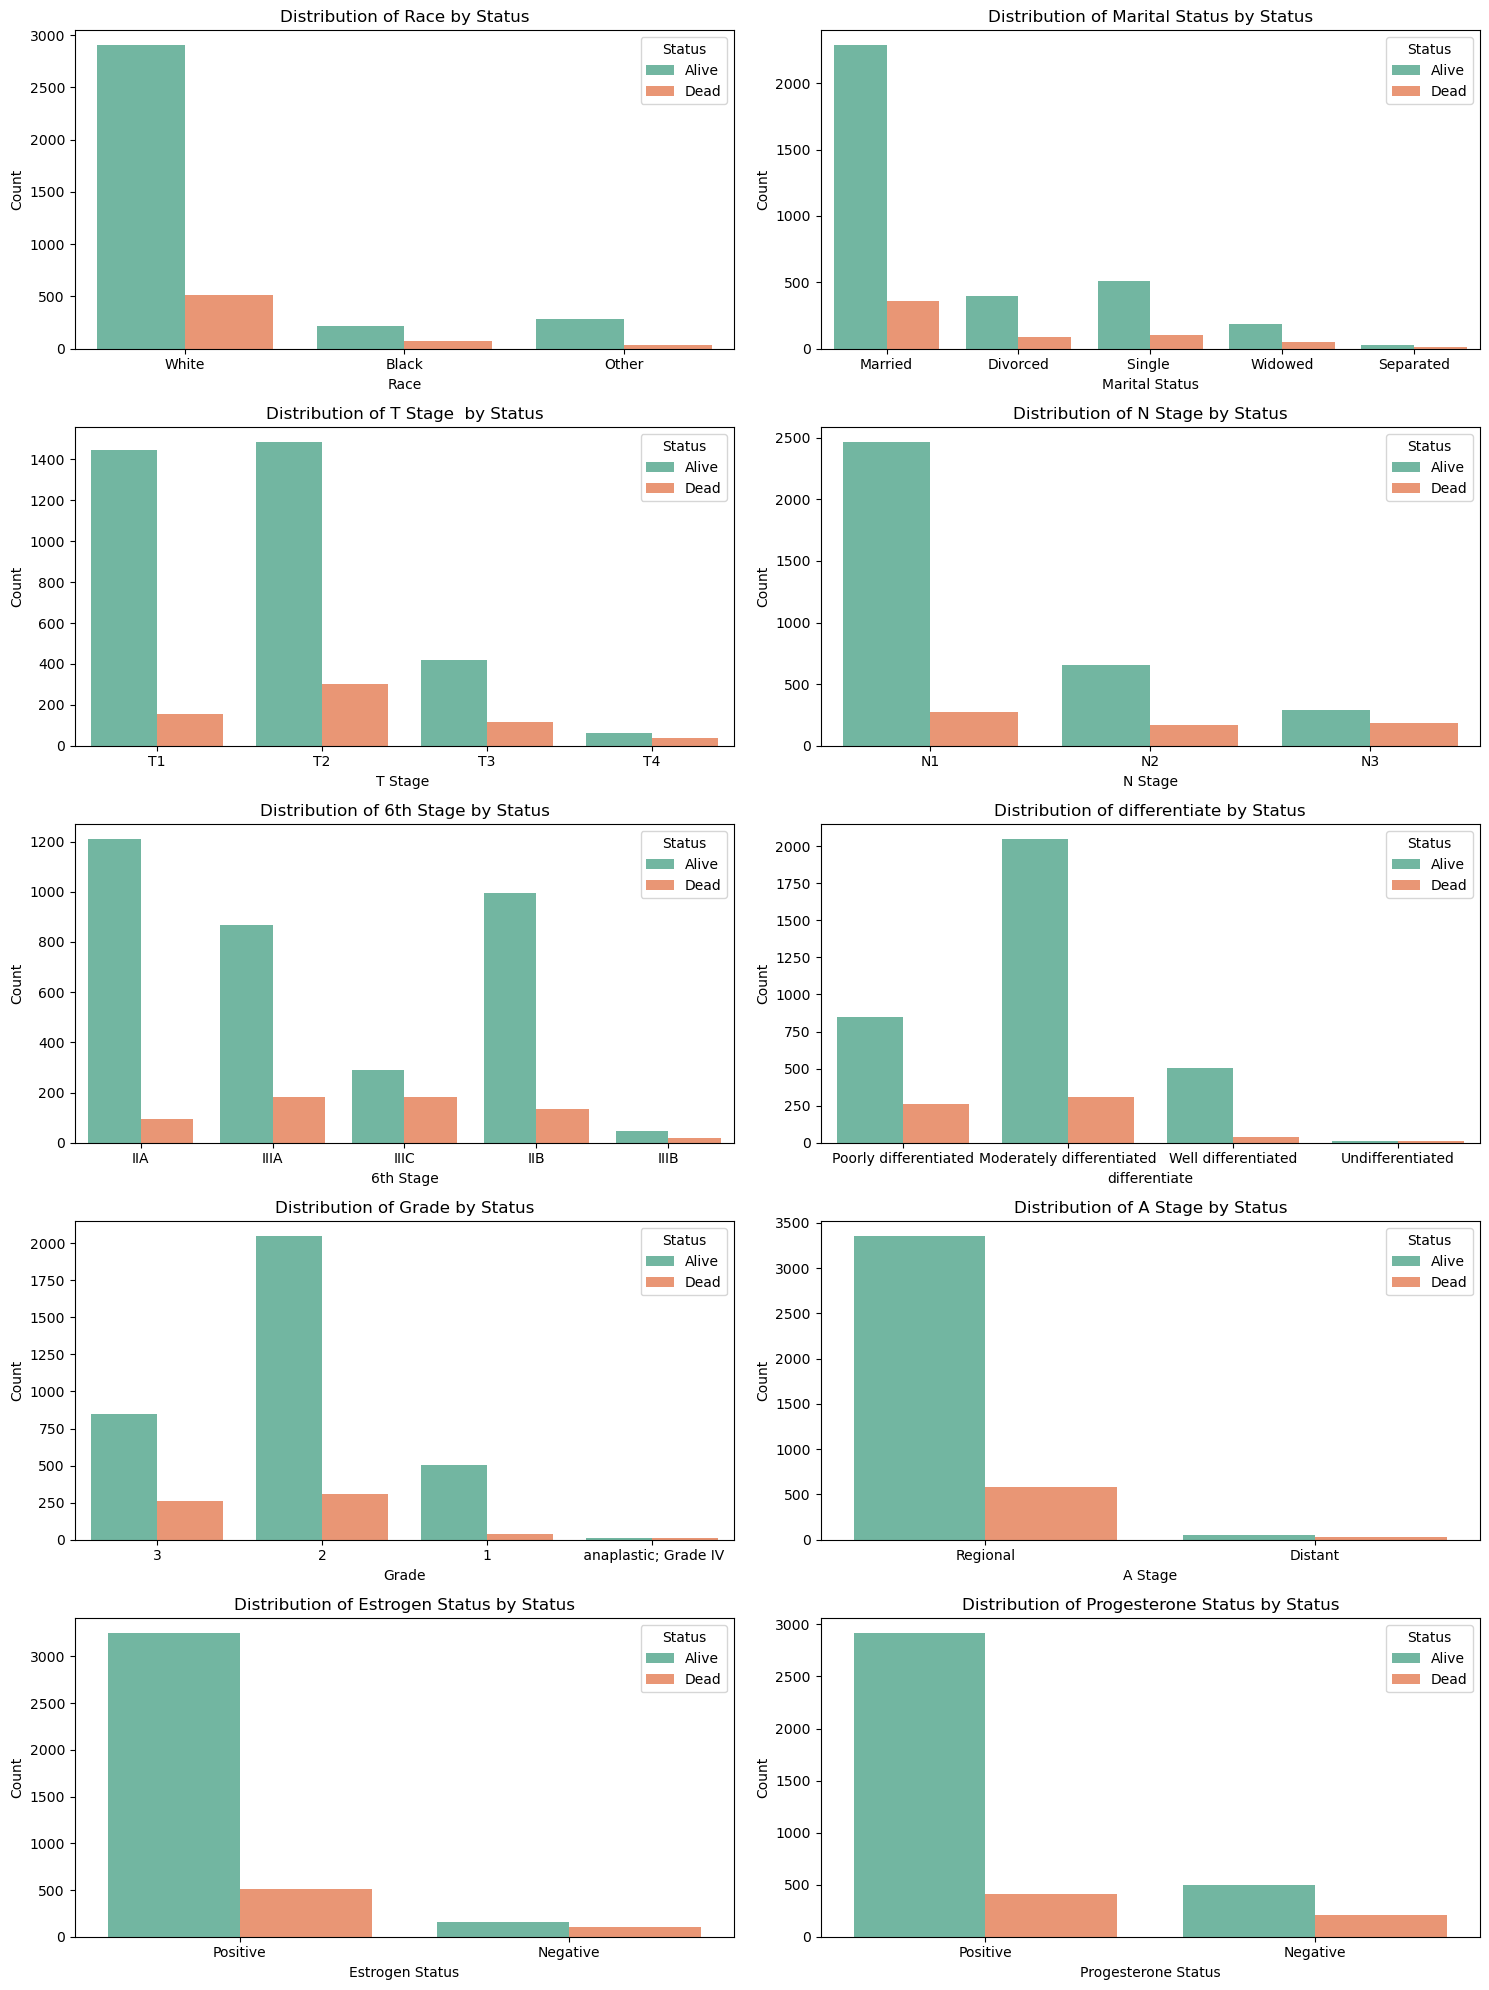

In [107]:
#here we create a plot of the distribution of the categorical columns with repsect to status
columns_to_plot = data[categorical_cols].drop(columns='Status',axis=1)
plt.figure(figsize=(15, 20))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(5, 2, i)  # Adjust based on the number of plots (5 rows, 2 columns here)
    sns.countplot(x=col, hue='Status', data=data[categorical_cols], palette='Set2')
    plt.title(f'Distribution of {col} by Status')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [108]:
#Define the data we are using for classification i.e. the categorical_colss
X = data[categorical_cols]
#One-Hot encode the variables
X=pd.get_dummies(X, drop_first=True, dtype=int)
X.head(25)

,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage _T2,T Stage _T3,T Stage _T4,N Stage_N2,...,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Status_Dead
0,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,1,1,0
1,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,1,1,1,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,1,1,0
3,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,1,1,0
4,0,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,1,1,0
5,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,0
6,0,1,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,1,0
7,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,1,1,1
8,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,1,1,1,0
9,0,1,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,1,0


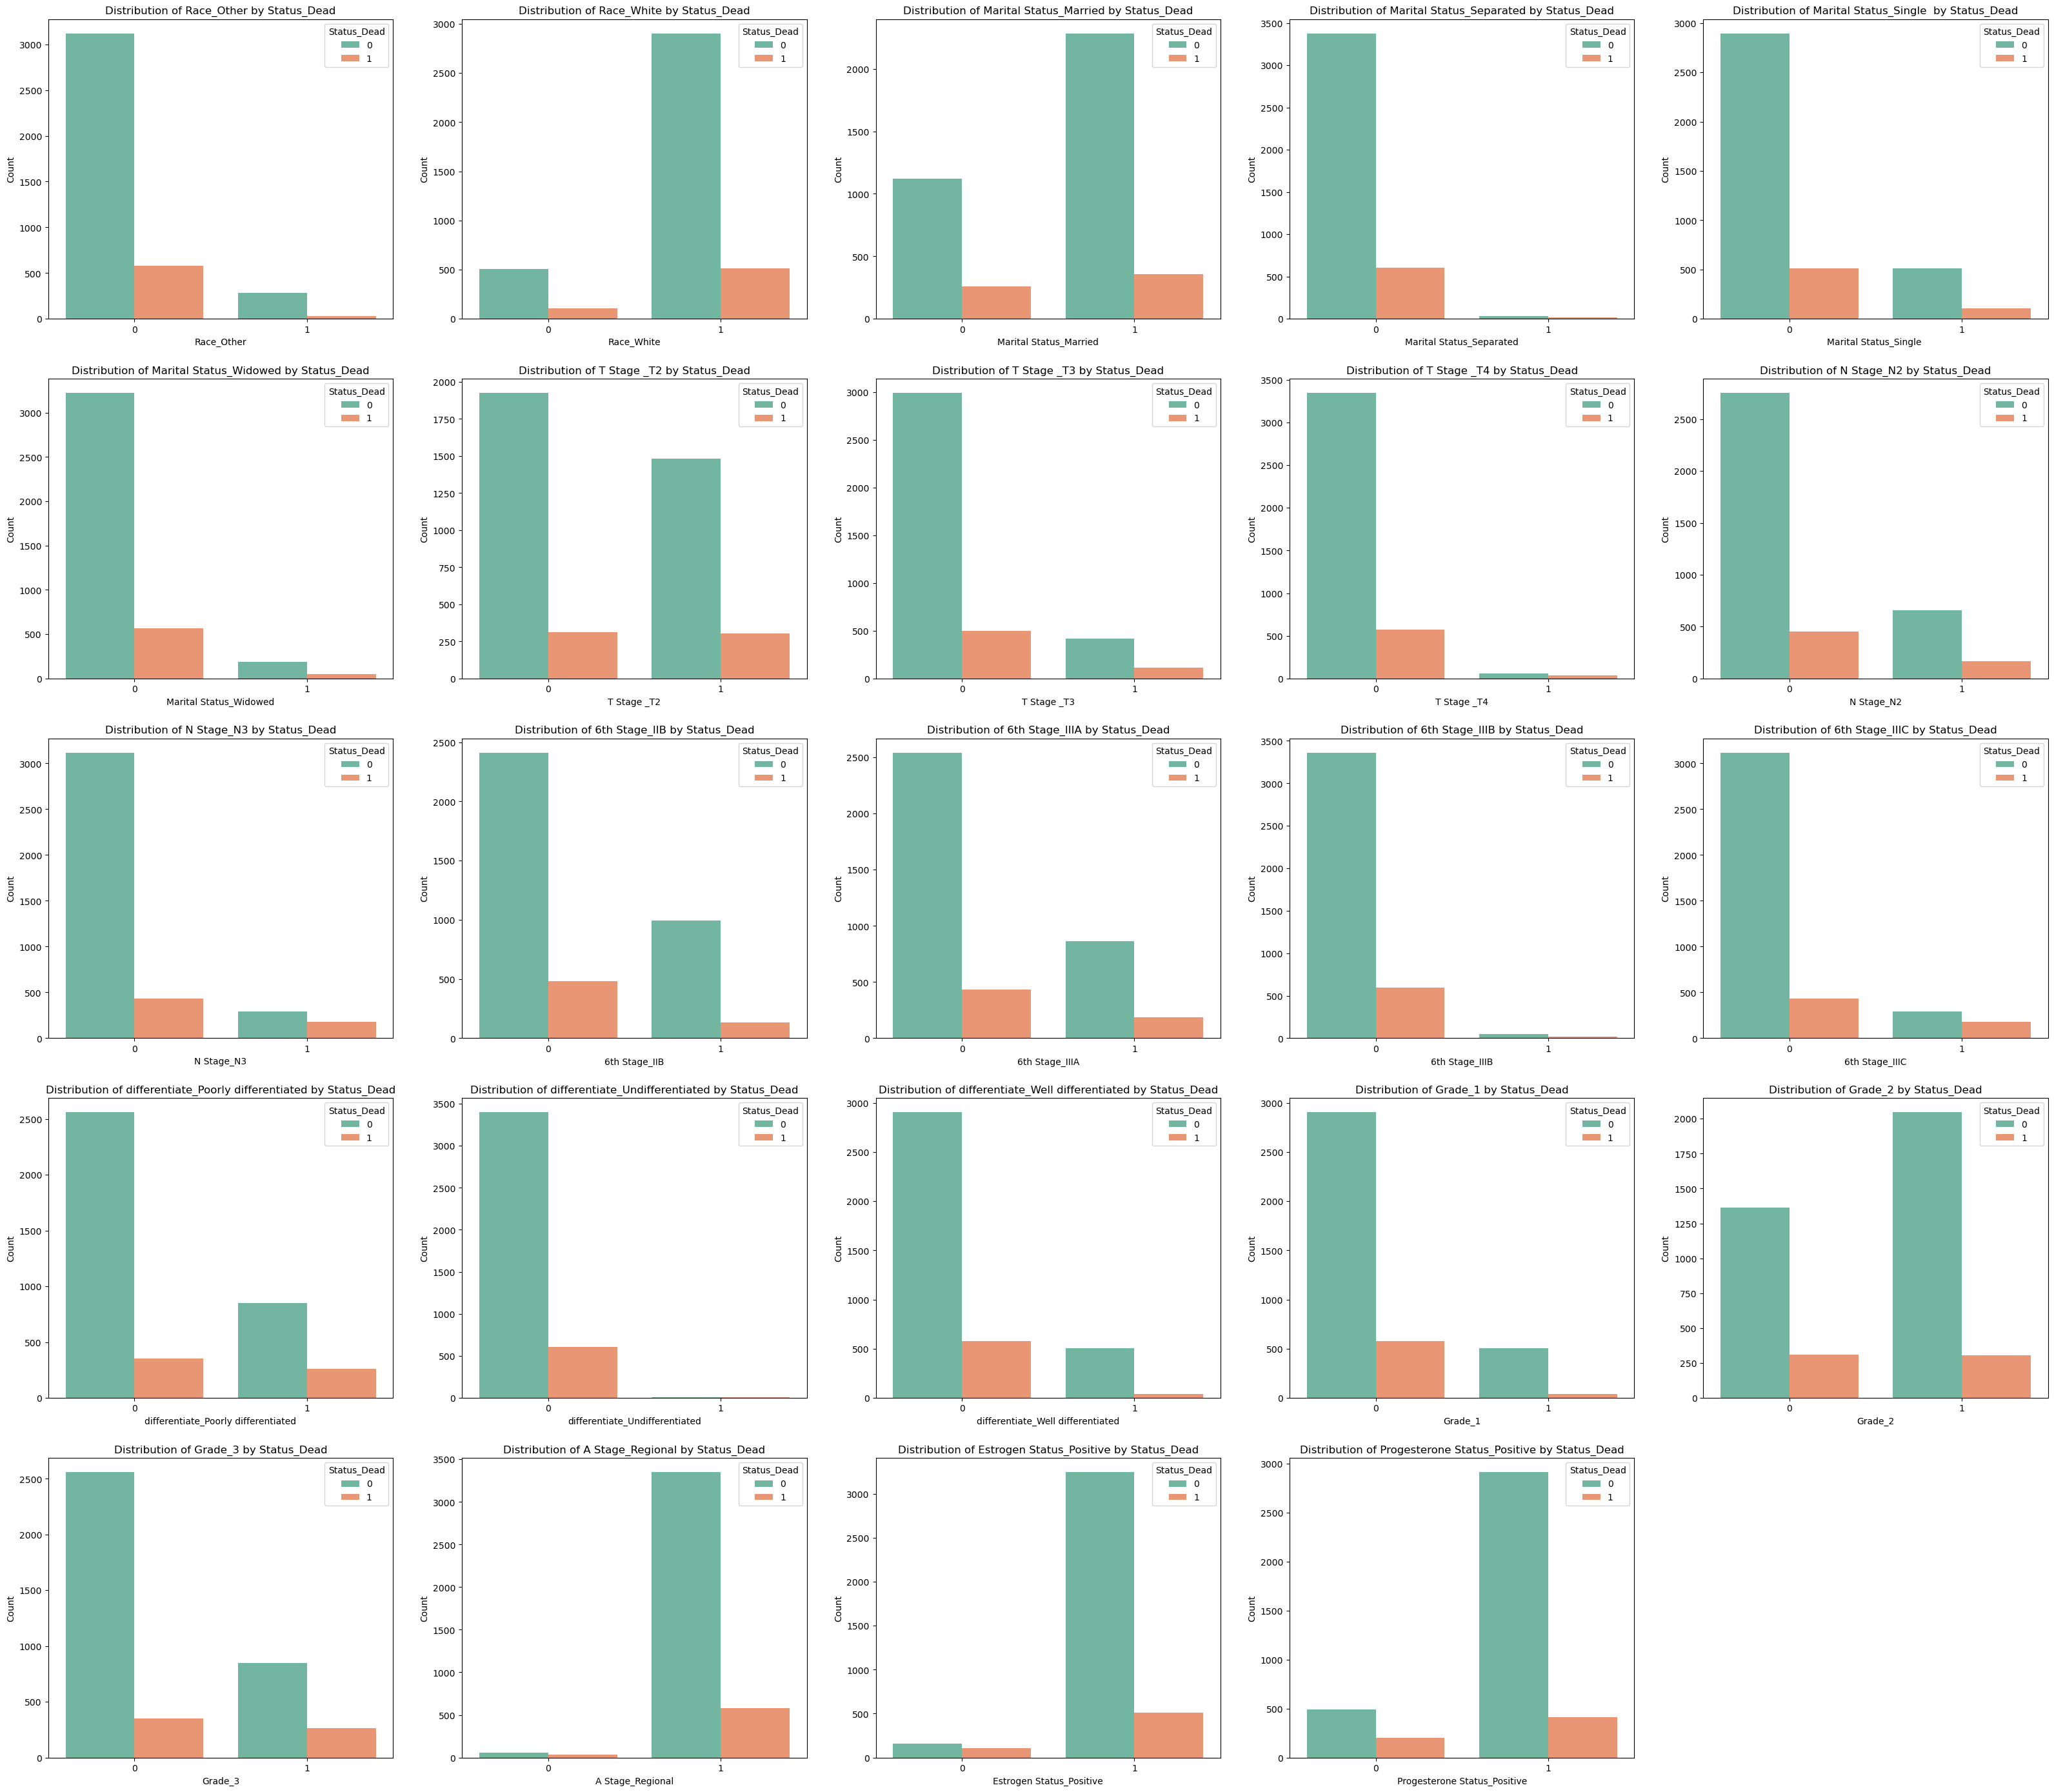

In [109]:
#   Visualize the encoded variables above

plt.figure(figsize=(40, 35))
for i, col in enumerate(X.columns[:-1], 1):  # Exclude 'Status_Dead'
    plt.subplot(5, 5, i)  # Adjust based on the number of plots (5 rows, 5 columns here)
    sns.countplot(x=col, hue='Status_Dead', data=X, palette='Set2')
    plt.title(f'Distribution of {col} by Status_Dead')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.show()

In [110]:
#select the features(X_cat) and the target(y_cat) 
y_cat = X['Status_Dead']
X_cat = X.drop(columns='Status_Dead',axis = 1)

In [111]:
#create the test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size=0.3, random_state=1)

## The Logistic Regression Model

In [112]:
#create the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [113]:
#make predictions for the model
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

The outcome of the training classification report is:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2390
           1       0.59      0.10      0.17       426

    accuracy                           0.85      2816
   macro avg       0.73      0.54      0.54      2816
weighted avg       0.82      0.85      0.81      2816




The outcome of the test classification report is:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1017
           1       0.70      0.14      0.23       190

    accuracy                           0.86      1207
   macro avg       0.78      0.56      0.57      1207
weighted avg       0.84      0.86      0.81      1207




The confusion matric for the train set is:
[[2362   28]
 [ 385   41]]



The confusion matric for the test set is:
[[1006   11]
 [ 164   26]]



The accuracy score for the train set is: 0.8533380681818182
The accuracy score for the test

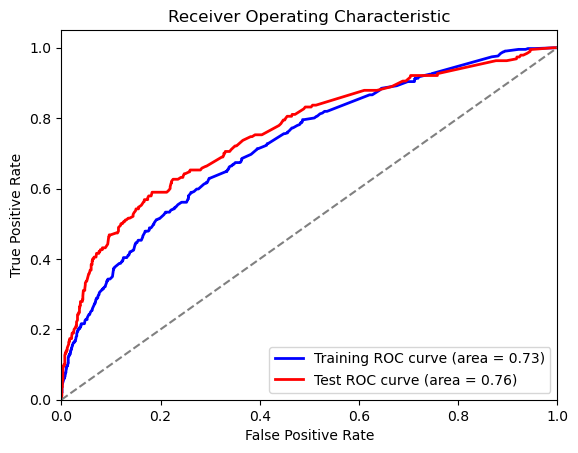

In [114]:
#Model Evaluation
#Creating a classification report 
train_class_report = classification_report(y_train, y_pred_train)
test_class_report = classification_report(y_test, y_pred_test)
#Display the results of the classification report
print('The outcome of the training classification report is:')
print(train_class_report)
print('\n\n')
print('The outcome of the test classification report is:')
print(test_class_report)
print('\n\n')

#Let's create a confusion matrix that can helpprovide a summary of prediction results
train_conf_mat = confusion_matrix(y_train, y_pred_train)
test_conf_mat = confusion_matrix(y_test, y_pred_test)
#Display the confusion matrix results for the train and test sets
print('The confusion matric for the train set is:')
print(train_conf_mat)
print('\n\n')
print('The confusion matric for the test set is:')
print(test_conf_mat)
print('\n\n')

#Now let's look at the accuracy score for both sets 
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
#Display the results of the accuracy score
print('The accuracy score for the train set is:', train_acc)
print('The accuracy score for the test set is:', test_acc)

#Fianlly we should consider the ROC curve and the AUC
#start by getting probability estimates of the positive class
y_train_prob = logreg.predict_proba(X_train)[:, 1]
y_test_prob = logreg.predict_proba(X_test)[:, 1]
#ROC curve for the training data
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)
#ROC curve for the test set
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)
#plot the ROC curve
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC curve (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Decision tree model


### Vanilla Model of the Decision Tree

In [115]:
#Initiate the classifier
clf = DecisionTreeClassifier(random_state=42)

#fit it on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [116]:
# Make predictions
y_tr_pred = clf.predict(X_train)
y_te_pred = clf.predict(X_test)

The classification report for the training set is:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94      2390
           1       0.89      0.26      0.40       426

    accuracy                           0.88      2816
   macro avg       0.89      0.63      0.67      2816
weighted avg       0.88      0.88      0.85      2816



The classification report for the test set is:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1017
           1       0.53      0.21      0.30       190

    accuracy                           0.85      1207
   macro avg       0.70      0.59      0.60      1207
weighted avg       0.81      0.85      0.82      1207


\n
the accuracy for the training set is: 0.8831676136363636
th eaccuracy for the test set is: 0.8458989229494615




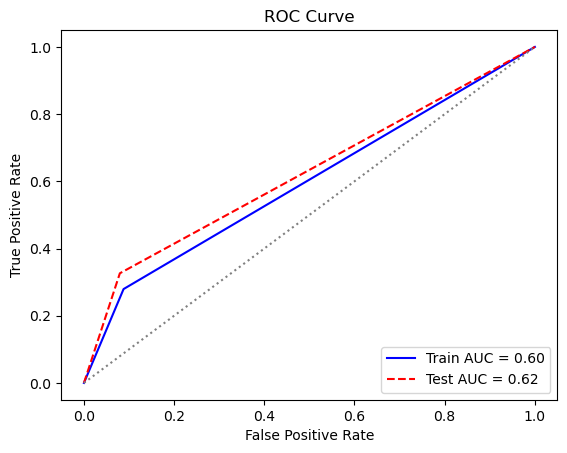

In [137]:
# Evaluate the model
#Look at the classification report
print('The classification report for the training set is:')
print(classification_report(y_train, y_tr_pred))
print('\n')
print('The classification report for the test set is:')
print(classification_report(y_test, y_te_pred))
print('\n\\n')
#Show accuracy for both sets
print('the accuracy for the training set is:',accuracy_score(y_train, y_tr_pred))
print('th eaccuracy for the test set is:', accuracy_score(y_test, y_te_pred))
print('\n')
#Create the ROC curve and AUC for both sets
#start by getting the probability for each od the sets
clf_train_prob = clf.predict_proba(X_train)[:, 1] 
clf_test_prob = clf.predict_proba(X_test)[:, 1] 
#calculate the ROC and auc 
train_fpr, train_tpr, train_threshold = roc_curve(y_train, clf_train_prob)
train_auc = auc(train_fpr, train_tpr)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, clf_test_prob)
test_auc = auc(test_fpr, test_tpr)
#plot the ROC roc_curve
plt.figure()
plt.plot(train_fpr, train_tpr, color='blue', label=f'Train AUC = {train_auc:.2f}')
plt.plot(test_fpr, test_tpr, color='red', linestyle='--', label=f'Test AUC = {test_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

 ### Insights from the results 
1. Precision, Recall and F1_score 
    class 0 (Majority Class):

    Training Set: Precision = 0.88, Recall = 0.99, F1-Score = 0.94
    Test Set: Precision = 0.87, Recall = 0.97, F1-Score = 0.91
    The model performs very well for class 0, with high precision, recall, and F1-score in both the training and test sets. This suggests that the model is highly confident and accurate when predicting the majority class (class 0).

    Class 1 (Minority Class):

    Training Set: Precision = 0.89, Recall = 0.26, F1-Score = 0.40
    Test Set: Precision = 0.53, Recall = 0.21, F1-Score = 0.30
    The performance for class 1 is notably weaker, particularly in terms of recall and F1-score. This indicates that the model is struggling to correctly identify instances of the minority class (class 1), leading to many false negatives. The low recall means that many positive instances (class 1) are being missed.

2. Imbalance in Performance

    The disparity between the performance on class 0 and class 1 suggests that the model is biased towards predicting the majority class. This is common in imbalanced datasets where one class significantly outnumbers the other. The model's high accuracy is driven by its performance on class 0, but its ability to detect class 1 is poor.

3. Conclusion

    While the model performs well overall, its ability to detect the minority class (class 1) is lacking.There is aneed to address the class imbalance in the data.
    

### Addressing class imbalance

There are several ways in whiv=ch the class imbalance can be addressed and the one of the methods we are going to consider first is the use of  SMOTE. This is a resampling technique where we use oversampling for the minority class.

In [120]:
#Apply SMOTE to the training dta
smote = SMOTE(random_state=42)
smote_X_train, smote_y_train = smote.fit_resample(X_train,y_train)

In [122]:
#Train a model
clf.fit(smote_X_train, smote_y_train)

DecisionTreeClassifier(random_state=42)

In [123]:
#create predctions for train and test sets
smote_train_pred = clf.predict(smote_X_train)
smote_test_pred = clf.predict(X_test)

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      2390
           1       0.78      0.75      0.77      2390

    accuracy                           0.77      4780
   macro avg       0.77      0.77      0.77      4780
weighted avg       0.77      0.77      0.77      4780

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1017
           1       0.27      0.49      0.35       190

    accuracy                           0.71      1207
   macro avg       0.58      0.62      0.58      1207
weighted avg       0.79      0.71      0.74      1207




the accuracy for the training set is: 0.7713389121338912
th eaccuracy for the test set is: 0.7050538525269263




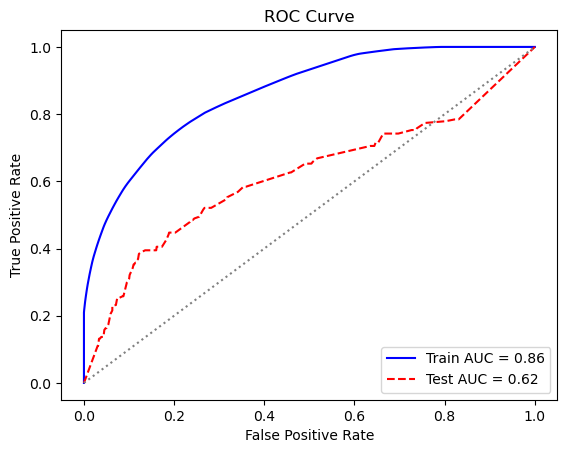

In [130]:

print("Classification Report for Training Set:")
print(classification_report(smote_y_train, smote_train_pred))
print("Classification Report for Test Set:")
print(classification_report(y_test, smote_test_pred))
print('\n\n')
#Show accuracy for both sets
print('the accuracy for the training set is:',accuracy_score(smote_y_train, smote_train_pred))
print('th eaccuracy for the test set is:', accuracy_score(y_test, smote_test_pred))
print('\n')
#Create the ROC curve and AUC for both sets
#start by getting the probability for each od the sets
smote_train_prob = clf.predict_proba(smote_X_train)[:, 1] 
smote_test_prob = clf.predict_proba(X_test)[:, 1] 
#calculate the ROC and auc 
smote_train_fpr, smote_train_tpr, smote_train_threshold = roc_curve(smote_y_train, smote_train_prob)
train_auc = auc(smote_train_fpr, smote_train_tpr)
smote_test_fpr, smote_test_tpr, smote_test_threshold = roc_curve(y_test, smote_test_prob)
test_auc = auc(smote_test_fpr, smote_test_tpr)
#plot the ROC roc_curve
plt.figure()
plt.plot(smote_train_fpr, smote_train_tpr, color='blue', label=f'Train AUC = {train_auc:.2f}')
plt.plot(smote_test_fpr, smote_test_tpr, color='red', linestyle='--', label=f'Test AUC = {test_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle=':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Now while the use of SMOTE has addressed the issue of class imbalance , the model may still need further refinement to generalize better on unseen data. Here below are some key highlights supporting this:

1. ROC Curve Analysis:

    Train AUC: 0.86
    Test AUC: 0.62
    The train AUC has increased slightly from 0.83 to 0.86, indicating that the model is better at distinguishing between classes on the training data after SMOTE was applied. The test AUC remains the same at 0.62, suggesting that the model's ability to generalize to unseen data hasn't improved significantly.

2. Classification Report Summary:

    Training Set (After SMOTE):
    Accuracy: 0.77
    Precision for class 1: 0.78
    Recall for class 1: 0.75
    F1-score for class 1: 0.77
    
    Test Set (After SMOTE):
    Accuracy: 0.71
    Precision for class 1: 0.27
    Recall for class 1: 0.49
    F1-score for class 1: 0.35
    Interpretation:

3. Impact of SMOTE:

    SMOTE has balanced the classes in the training data, leading to a more balanced precision and recall for both classes in the training set.
    For the test set, the recall for class 1 (the minority class) improved from 0.21 to 0.49, indicating the model's improved ability to identify positive cases. However, the precision for class 1 decreased from 0.53 to 0.27, showing that the model is now making more false positive errors.
4. Accuracy Decrease:

    The overall accuracy on both training and test sets has decreased compared to before applying SMOTE (from 0.88 to 0.77 on the training set and from 0.85 to 0.71 on the test set). This is typical when using SMOTE as the model is forced to learn more about the minority class, which can reduce accuracy but improve the balance of errors between classes.
    Model Generalization:

The test AUC remains unchanged at 0.62, which suggests that while the model's ability to handle class imbalance has improved, its overall discriminatory power on unseen data hasn't.


Now we want to try and tune this model by trying to fine tune the hyperparameters and then have a final model.

### Hyperparaameter tuning I
We want to start by looking for the maximum depth of the model

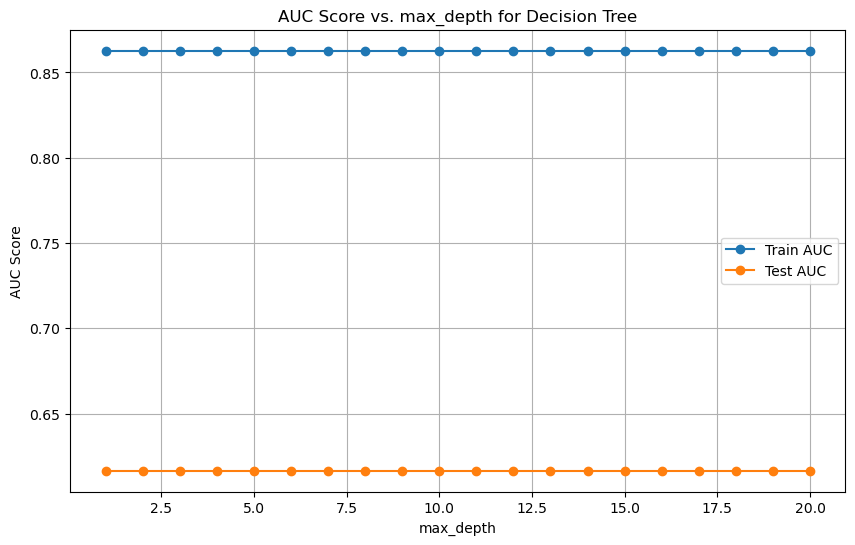

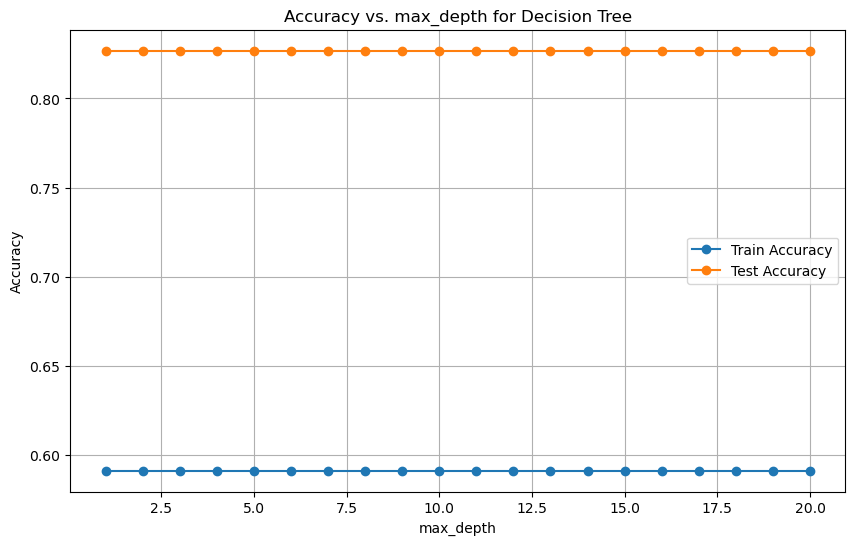

Best max_depth based on Test AUC: 1
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.56      0.91      0.69      2390
           1       0.75      0.27      0.40      2390

    accuracy                           0.59      4780
   macro avg       0.66      0.59      0.54      4780
weighted avg       0.66      0.59      0.54      4780

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1017
           1       0.43      0.33      0.37       190

    accuracy                           0.83      1207
   macro avg       0.66      0.62      0.64      1207
weighted avg       0.81      0.83      0.82      1207

Train AUC: 0.59
Test AUC: 0.62


In [134]:
# Initialize lists to store results for different depths
depths = range(1, 21)
train_aucs = []
test_aucs = []
train_accuracies = []
test_accuracies = []

# Loop over different values of max_depth
for max_depth in depths:
    # Calculate ROC AUC scores for both sets
    train_auc = roc_auc_score(smote_y_train, smote_train_prob)
    test_auc = roc_auc_score(y_test, smote_test_prob)
    
    # Calculate accuracy for both sets
    train_accuracy = clf.score(smote_X_train, smote_y_train)
    test_accuracy = clf.score(X_test, y_test)
    
    # Store the results
    train_aucs.append(train_auc)
    test_aucs.append(test_auc)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Step 5: Plot AUC scores for different max_depth values
plt.figure(figsize=(10, 6))
plt.plot(depths, train_aucs, marker='o', label='Train AUC')
plt.plot(depths, test_aucs, marker='o', label='Test AUC')
plt.xlabel('max_depth')
plt.ylabel('AUC Score')
plt.title('AUC Score vs. max_depth for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Plot Accuracy for different max_depth values
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(depths, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. max_depth for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Output classification report for the best max_depth
best_depth = depths[test_aucs.index(max(test_aucs))]
print(f"Best max_depth based on Test AUC: {best_depth}")

best_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_clf.fit(smote_X_train, smote_y_train)

smote_train_pred = best_clf.predict(smote_X_train)
smote_test_pred = best_clf.predict(X_test)

print("Classification Report for Training Set:")
print(classification_report(smote_y_train, smote_train_pred))

print("Classification Report for Test Set:")
print(classification_report(y_test, smote_test_pred))

train_auc = roc_auc_score(smote_y_train, best_clf.predict_proba(smote_X_train)[:, 1])
test_auc = roc_auc_score(y_test, best_clf.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.2f}")
print(f"Test AUC: {test_auc:.2f}")


Here are some key take aways from the results above:
1. The model's simplicity: The ideal max_depth will be 1suggesting the model is very simple, reflected in the low performance of themetrics especially for class 1
2. The low recall and F1-scores for class 1 in both the training and test sets suggest that the model struggles to detect the minority class, which is a common issue in imbalanced datasets.
3. Although there isn’t a large gap between Train and Test AUC, the overall performance is poor, suggesting that a deeper or more complex model may be necessary to capture the patterns in the data, though care must be taken to avoid overfitting

From the data above it is clear that when we use that data that has been oversampled that all the test performance does not increase accross all samples hence there is no positive effect on the test performance.

It is safe to make the assumption that whether we include a different approach of tuning the decion tree the results will be fairly the same in that there willl be no change in the test performance of the model.

## LOGISTIC REGRESSION vs DECISION TREE 
### Analysis of the two models
Choosing the better model between the logistic regression and decision tree (with SMOTE) depends on your specific goals and the trade-offs you’re willing to make. Here’s a comparison based on the provided results:

### Logistic Regression

- **Training Accuracy**: 85.33%
- **Test Accuracy**: 85.50%
- **Precision and Recall**:
  - **Class 0**: High precision (0.86), recall (0.99), and f1-score (0.92) on both training and test sets.
  - **Class 1**: Lower precision (0.59 train, 0.70 test) and very low recall (0.10 train, 0.14 test).

### Decision Tree tuned (max_depth) after SMOTE

- **Training Accuracy**: 59% (This seems lower compared to the logistic regression, possibly due to overfitting or the model complexity.)
- **Test Accuracy**: 83%
- **Precision and Recall**:
  - **Class 0**: Precision (0.88 test), recall (0.92 test), and f1-score (0.90 test) are high.
  - **Class 1**: Lower precision (0.43 test), recall (0.33 test), and f1-score (0.37 test).

### Comparative Analysis

1. **Overall Accuracy**: Logistic regression has higher accuracy on both the training and test sets compared to the tuned decision tree.
2. **Class 0 Performance**: Both models perform well on Class 0, but logistic regression maintains consistency across both sets.
3. **Class 1 Performance**:
   - The tuned decision tree shows some improvement in recall and precision for Class 1 compared to the original logistic regression, but the metrics are still relatively low. 
   - Logistic regression's performance on Class 1 is quite poor, but the decision tree performs better in recall, suggesting it may better identify some of the minority class samples.

### Suitability

- **Logistic Regression**: 
  - **Pros**: Consistently high performance on Class 0, high overall accuracy.
  - **Cons**: Struggles with Class 1, leading to a potential underrepresentation of the minority class.
  
- **Decision Tree with SMOTE**:
  - **Pros**: Improved handling of the minority class (Class 1) due to SMOTE.
  - **Cons**: Lower overall accuracy and training accuracy, potentially overfitting or too simplistic due to max_depth of 1.

### Recommendation

If the primary concern is overall accuracy and robust performance on the majority class (Class 0), **logistic regression** is better. However, if improving performance on the minority class (Class 1) is critical and there is a posibility of experimenting with more complex models, the **decision tree with SMOTE** might offer better potential with further tuning.

Trying more advanced models like Random Forests, Gradient Boosting, or Support Vector Machines should be considered, which can potentially offer a better balance between precision and recall for both classes.

To explore further adjustments or other models, the choice depends on the specific application and which metric (precision, recall, F1-score) is more important for the hospital.